# Random Forest

In [ ]:
#importing required Libraries
import pandas as pd
import numpy as np

In [ ]:
#Loading the data
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
#Visualizing tops rows of your dataset
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
df.shape

(400, 5)

In [ ]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [ ]:
#Finding for null values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df1=df.drop(columns=['User ID'],axis=1)

In [ ]:
df1

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder() #initializing

In [ ]:
df1.Gender=le.fit_transform(df1.Gender)

In [ ]:
df1

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [ ]:
import seaborn as sns

<ipython-input-16-f1c3f290915d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.Age)


<Axes: xlabel='Age', ylabel='Density'>

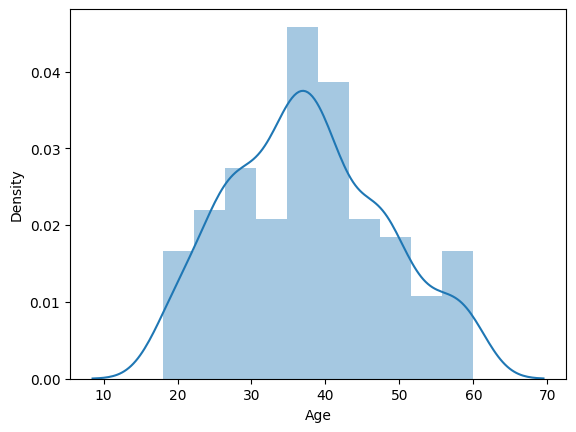

In [ ]:
sns.distplot(df1.Age)

<Axes: ylabel='EstimatedSalary'>

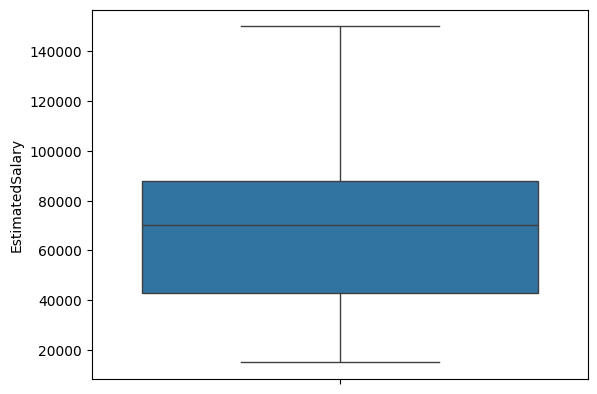

In [ ]:
sns.boxplot(df1.EstimatedSalary)

<Axes: ylabel='Age'>

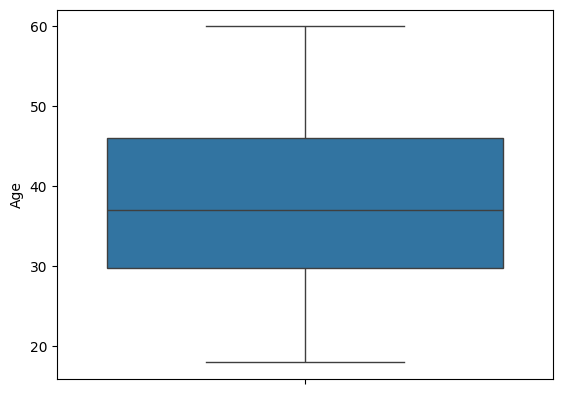

In [ ]:
sns.boxplot(df1.Age)

In [ ]:
df1.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<Axes: >

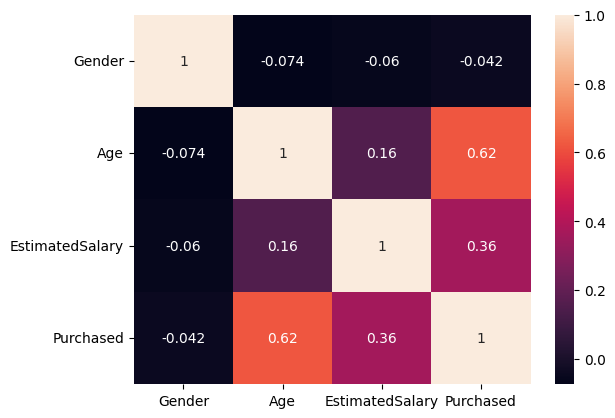

In [ ]:
sns.heatmap(df1.corr(),annot=True)

In [ ]:
#separating data
x=df1.drop('Purchased',axis=1)
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [ ]:
y=df1['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scale=MinMaxScaler()

In [ ]:
Scaled_x=pd.DataFrame(Scale.fit_transform(x),columns=x.columns)

In [ ]:
Scaled_x

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852
...,...,...,...
395,0.0,0.666667,0.192593
396,1.0,0.785714,0.059259
397,0.0,0.761905,0.037037
398,1.0,0.428571,0.133333


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Scaled_x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(320, 3)

In [ ]:
x_test.shape

(80, 3)

# Model Building Using Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf=RandomForestClassifier()

In [48]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
pred=rf.predict(x_test)
pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test,pred)

0.9